# Week 6: RDKit (part 2)
Last week, we learned about the RDKit library and how to use it to manipulate and visualize molecules. This week, we will go in deeper and learn about the following topics:

* Substructure matching
    * Maximum common substructure
* Conformer generation

## Substructure matching
Substructure matching is a common task in cheminformatics. It is used to find a specific substructure in a molecule. RDKit provides a few functions for substructure searching. One of them is [`HasSubstructMatch`](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol.HasSubstructMatch), which returns `True` if the molecule contains the substructure and `False` otherwise. Another function is [`GetSubstructMatch`](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol.GetSubstructMatch), which returns the indices of the atoms in the molecule that match the substructure. Let's see an example of substructure matching using the `HasSubstructMatch` function.

Let's start by loading the RDKit library and the drug molecules from last week's exercise.

In [3]:
# some imports
from rdkit import Chem
from rdkit.Chem import PandasTools
import pandas as pd
from pathlib import Path
import os

In [4]:
current_file = Path(os.path.abspath(''))
csv_file = current_file.parent / "week_05" / "chembl_drugs.csv"
df = pd.read_csv(csv_file, sep= ";")
df.head()

,Parent Molecule,Name,Synonyms,Research Codes,Phase,Drug Applicants,USAN Stem,USAN Year,USAN Definition,USAN Stem - Substem,...,Passes Rule of Five,First In Class,Chirality,Prodrug,Oral,Parenteral,Topical,Black Box,Availability Type,Smiles
0,CHEMBL492491,FENVALERATE,BELMARK|FENVALERATE|PHENVALERATE|PYDRIN|S-5602...,S-5602|SD-43775|WL-43775,-1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,Racemic Mixture,0,0,0,0,0,Unknown,CC(C)C(C(=O)OC(C#N)c1cccc(Oc2ccccc2)c1)c1ccc(C...
1,CHEMBL2103777,THIOPHANATE,NSC-170810|THIOPHANATE,NSC-170810,-1.0,NaN,NaN,NaN,NaN,NaN,...,1,0,Achiral Molecule,0,0,0,0,0,Unknown,CCOC(=O)NC(=S)Nc1ccccc1NC(=S)NC(=O)OCC
2,CHEMBL1868702,GESTRINONE,A 46 745|A-46-745|A-46745|DIMETRIOSE|GESTRINON...,A 46 745|A-46-745|A-46745|R 2323|R-2323|RU 232...,4.0,NaN,'-estr-; -rinone',1978.0,estrogens; cardiotonics (amrinone type),'-estr-(-estr-); -rinone(-rinone)',...,1,0,Single Stereoisomer,0,0,0,0,0,Unknown,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...
3,CHEMBL2104213,DESMENINOL,DESMENINOL|METHIONINE HYDROXY ANALOG,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,...,1,0,Racemic Mixture,0,0,0,0,0,Unknown,CSCCC(O)C(=O)O
4,CHEMBL1904952,QUAZODINE,MJ 1988|MJ-1988|QUAZODINE,MJ 1988|MJ-1988,-1.0,NaN,NaN,1968.0,NaN,NaN,...,1,0,Achiral Molecule,0,0,0,0,0,Unknown,CCc1ncnc2cc(OC)c(OC)cc12


In [5]:
# remove the rows with NaN values for SMILES (you did it last week)
df = df.dropna(subset=["Smiles"])

In [8]:
# add molecule objects to the df from SMILES in a column named "mol" using RDKit functions (PandasTools or Chem module)
PandasTools.AddMoleculeColumnToFrame(df, smilesCol = "Smiles", molCol = "mol")

[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:31] WARNING: not removing hydrogen atom without neighbors
[14:18:32] WARNING: not removing hydrogen atom without neighbors
[14:18:32] WARNING: not removing hydrogen atom without neighbors
[14:18:32] WARNING: not removing hydrogen atom without neighbors
[14:18:32] WARNING: not removing hydrogen atom without neighbors


### Tyrosina Kinase Inhibitors
Tyrosine kinases are enzymes that catalyze the transfer of phosphate groups from ATP to tyrosine residues in proteins. The phosphorylation of proteins by tyrosine kinases is an important mechanism for the activation of signal transduction pathways in response to extracellular stimuli. The uncontrolled (or excessive) activity of tyrosine kinases can lead to cancer. Therefore, tyrosine kinases are an important target for cancer therapy. In the binding pocket of these kinases there is a conserved lysine residue that binds to the phosphate group of ATP (the "hinge region"). The inhibitors of tyrosine kinases are designed to mimic ATP and there's substructures ("motifs") known to enable binding the hinge region. For more information look at this paper: [Designing of kinase hinge binders: A medicinal chemistry perspective](https://onlinelibrary.wiley.com/doi/epdf/10.1111/cbdd.14024?saml_referrer)

First, let's get the motif that binds the hinge region of tyrosine kinases:

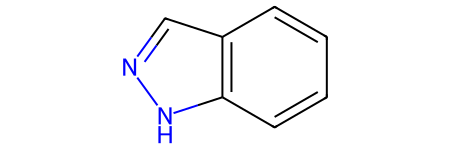

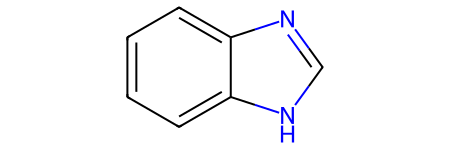

In [9]:
indazole_smi = "C1=CC=C2C(=C1)NC=N2"
indazole = Chem.MolFromSmiles(indazole_smi)
indazole

Let's test the [`HasSubstructMatch`](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol.HasSubstructMatch) function on one example molecule to see how it works.

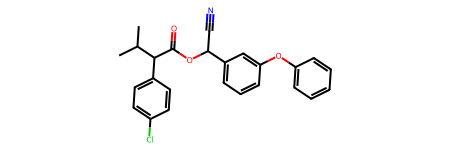

In [11]:
test_mol = df["mol"][0]
test_mol

In [14]:
test_mol.HasSubstructMatch(indazole)

False

Now, let's query all the drug molecules for the presence of the hinge binding motif. use the [`HasSubstructMatch`](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol.HasSubstructMatch) function in combinations with `pandas.apply` to check if the molecule contains the motif.

In [17]:
df['has_indazole'] = df["mol"].apply(lambda x: x.HasSubstructMatch(indazole))

`USAN Definitions` roughly tell us what class of drug we are looking at. We'll remove missing values for analysis purposes.

In [18]:
# remove rows that do not have a USAN definition
df = df.dropna(subset=["USAN Definition"])
df.head()

,Parent Molecule,Name,Synonyms,Research Codes,Phase,Drug Applicants,USAN Stem,USAN Year,USAN Definition,USAN Stem - Substem,...,Chirality,Prodrug,Oral,Parenteral,Topical,Black Box,Availability Type,Smiles,mol,has_indazole
2,CHEMBL1868702,GESTRINONE,A 46 745|A-46-745|A-46745|DIMETRIOSE|GESTRINON...,A 46 745|A-46-745|A-46745|R 2323|R-2323|RU 232...,4.0,NaN,'-estr-; -rinone',1978.0,estrogens; cardiotonics (amrinone type),'-estr-(-estr-); -rinone(-rinone)',...,Single Stereoisomer,0,0,0,0,0,Unknown,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...,<rdkit.Chem.rdchem.Mol object at 0x7feb528c0190>,False
7,CHEMBL2106893,METHOXYPHEDRINE,4-METHOXYMETHCATHINONE|J6.703B|METHEDRONE|METH...,J6.703B,-1.0,NaN,'-drine',NaN,sympathomimetics,'-drine(-drine)',...,Racemic Mixture,0,0,0,0,0,Unknown,CNC(C)C(=O)c1ccc(OC)cc1,<rdkit.Chem.rdchem.Mol object at 0x7feb528c0430>,False
9,CHEMBL1256871,SOBUZOXANE,SOBUZOXANE,NaN,-1.0,NaN,'-oxane',NaN,alpha-adrenoceptor antagonists (benzodioxane d...,'-oxane(-oxane)',...,Achiral Molecule,0,0,0,0,0,Unknown,CC(C)COC(=O)OCN1C(=O)CN(CCN2CC(=O)N(COC(=O)OCC...,<rdkit.Chem.rdchem.Mol object at 0x7feb528c0040>,False
17,CHEMBL64706,ORBOFIBAN,ORBOFIBAN|SC-57099B,SC-57099B,-1.0,NaN,'-fiban',1996.0,fibrinogen receptor antagonists (glycoprotein ...,'-fiban(-fiban)',...,Single Stereoisomer,0,0,0,0,0,Unknown,CCOC(=O)CCNC(=O)N[C@H]1CCN(c2ccc(C(=N)N)cc2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7feb528c0900>,False
18,CHEMBL462222,PENTAMUSTINE,NCNU|NEPTAMUSTINE|PENTAMUSTINE|Salisburystin,NCNU,-1.0,NaN,'-mustine',1980.0,antineoplastics (chloroethylamine derivatives),'-mustine(-mustine)',...,Achiral Molecule,0,0,0,0,0,Unknown,CC(C)(C)CNC(=O)N(CCCl)N=O,<rdkit.Chem.rdchem.Mol object at 0x7feb528c0ac0>,False


Filter the molecules:
* remove the molecules that do not contain the motif
* only keep molecules that are tyrosine kinase inhibitors

In [21]:
# 1) only keep those with the motif
df_fil = df[df["has_indazole"]]
df_fil.head()

,Parent Molecule,Name,Synonyms,Research Codes,Phase,Drug Applicants,USAN Stem,USAN Year,USAN Definition,USAN Stem - Substem,...,Chirality,Prodrug,Oral,Parenteral,Topical,Black Box,Availability Type,Smiles,mol,has_indazole
106,CHEMBL1742403,ALINASTINE,ALINASTINE,NaN,-1.0,NaN,'-astine',NaN,antihistaminics (histamine-H1 receptor antagon...,'-astine(-astine)',...,Achiral Molecule,0,0,0,0,0,Unknown,CCOCCn1c(C2CCN(CCc3ccc(C(C)(C)C)cc3)CC2)nc2ccc...,<rdkit.Chem.rdchem.Mol object at 0x7feb528c30d0>,True
194,CHEMBL25931,ADIBENDAN,ADIBENDAN|Adibendan,NaN,-1.0,NaN,'-dan',NaN,positive inotropic agents (pimobendan type),'-dan(-dan)',...,Achiral Molecule,0,0,0,0,0,Unknown,CC1(C)C(=O)Nc2cc3[nH]c(-c4ccncc4)nc3cc21,<rdkit.Chem.rdchem.Mol object at 0x7feb504d17e0>,True
286,CHEMBL2104918,IMOXITEROL,IMOXITEROL,NaN,-1.0,NaN,'-terol',NaN,bronchodilators (phenethylamine derivatives),'-terol(-terol)',...,Racemic Mixture,0,0,0,0,0,Unknown,COc1cc(C(O)CNC(C)CCn2cnc3ccccc32)ccc1O,<rdkit.Chem.rdchem.Mol object at 0x7feb504d80b0>,True
409,CHEMBL58711,TIVIRAPINE,NSC-636661|R-87027|TIVIRAPINE,NSC-636661|R-87027,-1.0,NaN,'-pine; -vir-',NaN,tricyclic compounds; antivirals,'-pine(-pine); -vir-(-vir-)',...,Single Stereoisomer,0,0,0,0,0,Unknown,CC(C)=CCN1Cc2c(Cl)ccc3[nH]c(=S)n(c23)C[C@@H]1C,<rdkit.Chem.rdchem.Mol object at 0x7feb504db680>,True
664,CHEMBL3422109,AVANBULIN,AVANBULIN|BAL-27862|BAL27862,BAL-27862|BAL27862,-1.0,NaN,'-bulin',2019.0,antineoplastics (mitotic inhibitors; tubulin b...,'-bulin(-bulin)',...,Achiral Molecule,0,0,0,0,0,Unknown,N#CCCNc1nonc1-c1nc2ccccc2n1CC(=O)c1ccc(N)cc1,<rdkit.Chem.rdchem.Mol object at 0x7feb504e2730>,True


In order to filter by target/mechanism of action, we will look at the USAN Definitions, which tell us the type of molecules we're dealing with.

In [22]:
# extract all USAN Definitions
moa = df_fil['USAN Definition'].unique().tolist()
moa

['antihistaminics (histamine-H1 receptor antagonists)',
 'positive inotropic agents (pimobendan type)',
 'bronchodilators (phenethylamine derivatives)',
 'tricyclic compounds; antivirals',
 'antineoplastics (mitotic inhibitors; tubulin binders)',
 'antithelmintics (tibendazole type)',
 "antianxiety agents/neuroleptics (4'-fluoro-4-piperidinobutyrophenone derivatives)",
 'ferrorportin receptor modulators',
 'beta-blockers (propranolol type)',
 'antiulcer agents (benzimidazole derivatives)',
 'antivirals',
 'angiotensin II receptor antagonists',
 'analgesics (mixed opiate receptor agonists/antagonists)',
 'serotonin 5-HT3 receptor antagonists',
 'antineoplastics (chloroethylamine derivatives)',
 'tyrosine kinase inhibitors',
 'antivirals: nonstructural protein 5A (NS5A) inhibitors',
 'hedgehog signaling inhibitors',
 'antivirals: viral capsid inhibitors',
 'enzyme inhibitors',
 'transient receptor potential antagonists; vanilloid 1 receptor antagonists',
 'poly-ADP-ribose polymerase inhi

In [23]:
# counts of moa in df_fil
df_fil['USAN Definition'].value_counts()

USAN Definition
antiulcer agents (benzimidazole derivatives)                                                                                                                                                                  20
antithelmintics (tibendazole type)                                                                                                                                                                            17
angiotensin II receptor antagonists                                                                                                                                                                            8
antivirals: nonstructural protein 5A (NS5A) inhibitors                                                                                                                                                         7
antivirals                                                                                                                                          

In this list by counts of molecules, we can see that anticancer drugs (antineoplastics) are the most common but also "tyrosine kinase inhibitors" are frequent. They appear with different names. Filter the dataframe so that the row `USAN Definitions` only needs to contain the string but does not need to match completely.

In [24]:
# 2) only keep tyrosine kinase inhibitors
tki = df_fil[df_fil['USAN Definition'].str.contains("tyrosine kinase inhibitor")]
tki

,Parent Molecule,Name,Synonyms,Research Codes,Phase,Drug Applicants,USAN Stem,USAN Year,USAN Definition,USAN Stem - Substem,...,Chirality,Prodrug,Oral,Parenteral,Topical,Black Box,Availability Type,Smiles,mol,has_indazole
6648,CHEMBL3787344,NAZARTINIB,EGF-816|EGF816|NAZARTINIB|NVP-EGF816-NX,EGF-816|EGF816|NVP-EGF816-NX,2.0,NaN,'-tinib',2018.0,tyrosine kinase inhibitors,'-tinib(-tinib)',...,Single Stereoisomer,0,0,0,0,0,Unknown,Cc1cc(C(=O)Nc2nc3cccc(Cl)c3n2[C@@H]2CCCCN(C(=O...,<rdkit.Chem.rdchem.Mol object at 0x7feb50562420>,True
10547,CHEMBL522892,DOVITINIB,CHIR-258|DOVITINIB|Dovitinib|GFKI-258|NVP-TKI2...,CHIR-258|GFKI-258|NVP-TKI258|TKI-258,3.0,NaN,'-tinib',2007.0,tyrosine kinase inhibitors,'-tinib(-tinib)',...,Achiral Molecule,0,0,0,0,0,Unknown,CN1CCN(c2ccc3nc(-c4c(N)c5c(F)cccc5[nH]c4=O)[nH...,<rdkit.Chem.rdchem.Mol object at 0x7feb50d29fc0>,True
10575,CHEMBL3187723,BINIMETINIB,ARRY 438162|ARRY-162|ARRY-438162|BINIMETINIB|B...,ARRY 438162|ARRY-162|ARRY-438162|MEK-162|MEK16...,4.0,Array Biopharma Inc,'-tinib',2014.0,tyrosine kinase inhibitors: tyrosine kinase in...,'-tinib(-tinib (-metinib))',...,Achiral Molecule,0,1,0,0,0,Prescription Only,Cn1cnc2c(F)c(Nc3ccc(Br)cc3F)c(C(=O)NOCCO)cc21,<rdkit.Chem.rdchem.Mol object at 0x7feb50d2a730>,True
11220,CHEMBL1614701,SELUMETINIB,ARRY-142886|ARRY-886|AZD-6244|AZD6244|SELUMETI...,ARRY-142886|ARRY-886|AZD-6244|AZD6244,4.0,Astrazeneca Pharmaceuticals Lp,'-tinib',2009.0,tyrosine kinase inhibitors: tyrosine kinase in...,'-tinib(-tinib (-metinib))',...,Achiral Molecule,0,1,0,0,0,Prescription Only,Cn1cnc2c(F)c(Nc3ccc(Br)cc3Cl)c(C(=O)NOCCO)cc21,<rdkit.Chem.rdchem.Mol object at 0x7feb50d36ab0>,True


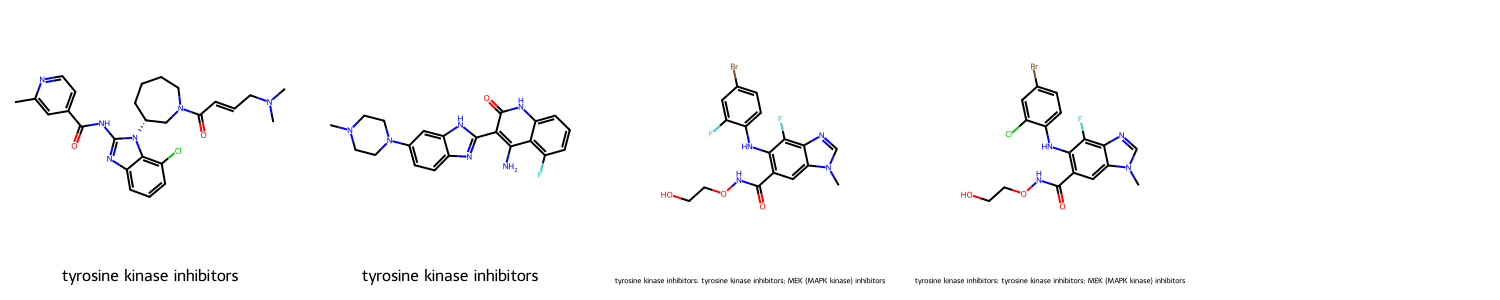

In [30]:
# visualize the remaining TKI structures using the PandasTools.FrameToGridImage function
PandasTools.FrameToGridImage(tki, column = "mol", legendsCol = "USAN Definition", molsPerRow = 5, subImgSize = (300,300))

The function [`GetSubstructMatch`](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol.GetSubstructMatch) returns the indices of the atoms in the molecule that match the substructure. Let's use this function to visualize the substructure in the first molecule.

In [34]:
mol = tki['mol'].iloc[0]
match_indices = mol.GetSubstructMatch(indazole)
match_indices

(11, 12, 13, 15, 9, 10, 8, 7, 16)

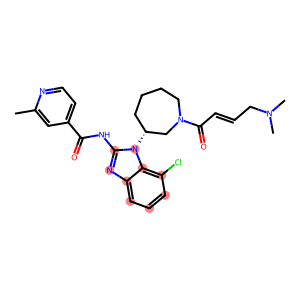

In [36]:
#  highlight the indazole motif using the Draw.MolToImage function
from rdkit.Chem import Draw
img = Draw.MolToImage(mol, highlightAtoms = match_indices)
img

### Thalidomide case
Let's look at a different example:

We'll extract the structure for the drug thalidomide and the substructure for the imide group. Thalidomide is a drug that was used in the late 1950s and early 1960s to treat morning sickness in pregnant women. However, it was later found to cause birth defects, and it was withdrawn from the market. The imide group is a functional group that contains a carbonyl group bonded to a nitrogen atom. Only the R-enantiomer of thalidomide is effective as a sedative, while the S-enantiomer is teratogenic. The imide group is present in both enantiomers. Let's check which enantiomer of thalidomide is present in our database.

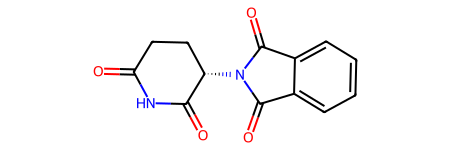

In [37]:
s_thalidomide = Chem.MolFromSmiles('O=C1c2ccccc2C(=O)N1[C@H]3CCC(=O)NC3=O')
s_thalidomide

In [42]:
# find the Thalidomide molecule object in the dataframe
thalidomide = df[df["Name"] == "THALIDOMIDE"]['mol'].values[0]
type(thalidomide)

rdkit.Chem.rdchem.Mol

In [46]:
# check if the Thalidomide molecule object has the S motif using the HasSubstructMatch function
thalidomide.HasSubstructMatch(s_thalidomide)

True

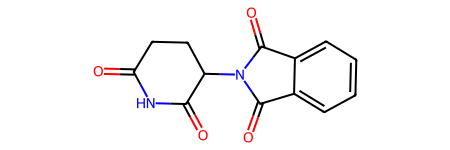

In [47]:
thalidomide

It tells us that the molecule does contain the s-enantiomer. However, when we look at the molecule, we see that actually no stereochemistry is defined. RDKit does not consider stereochemistry by default when searching for substructures. We can change this by setting the `useChirality` parameter to `True`. Let's see if we can find the s-enantiomer of thalidomide in our database.

In [48]:
# check if thalidomide contains the S-enantiomer by enforcing chirality
thalidomide.HasSubstructMatch(s_thalidomide, useChirality = True)

False

In this example, we query for the full molecule and not just a substructure. This is actually a good approach to check if two molecules are identical or not.

### Maximum common substructure (MCS)
Back to our example with tyrosine kinase inhibitors:

We saw that with prior knowledge on which substructure to look for we can find interesting typrosine kinase inhibitors that are found in chemotherapeutics. But what if we don't know what substructure to look for? This is where the maximum common substructure (MCS) comes in. The MCS is the largest common substructure between two molecules. It can be used to find the common substructure between two molecules, which can be useful in many applications, such as finding the common substructure between two molecules, or finding the common substructure between two molecules. The MCS can be found using the `rdkit.Chem.rdFMCS` module.

In [49]:
from rdkit.Chem import rdFMCS

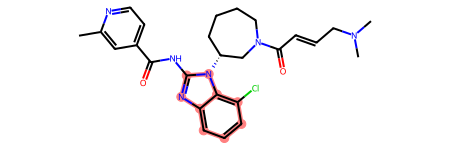

In [50]:
tki_mols = tki['mol'].tolist()
tki_mols[0]

Now, let's find the MCS between the list of molecules. Use the [`rdFMCS.FindMCS`](https://www.rdkit.org/docs/source/rdkit.Chem.rdFMCS.html) function. What does this function return and how can you visualize it?

In [51]:
mcs = rdFMCS.FindMCS(tki_mols)
mcs

We need to extract the SMARTS pattern from the MCS result and then visualize it. The SMARTS notation is similar to the SMILES structure in that it is string based but it described patterns rather than full structures. Here's a [link](https://ics.uci.edu/~dock/manuals/DaylightTheoryManual/theory.smarts.html#:~:text=All%20SMILES%20expressions%20are%20also,when%20used%20as%20a%20SMARTS.) on a quick overview of SMARTS for the curious.

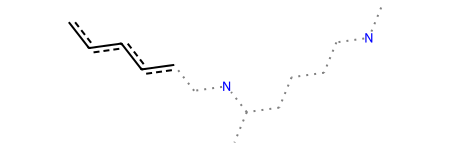

In [52]:
mcs_smarts = mcs.smartsString
mcs_mol = Chem.MolFromSmarts(mcs_smarts)
mcs_mol

Great! This is exactly what we expected. The MCS is the substructure that we initially used to filter the molecules. Therefore, it is not surprising to find it as the MCS. What happens if we look at all the tyrosine kinase inhibitors? Will the MCS be the same?

Extract all the molecules from the unflitered dataframe and find the MCS. What do you observe?

In [53]:
# extract all TKI molecules from the dataframe
tki_all = df[df['USAN Definition'].str.contains("tyrosine kinase inhibitor")]
mols_all = tki_all['mol'].tolist()
len(tki_all)

180

In [60]:
# extract the MCS (no new code here - copy from above!)
mcs = rdFMCS.FindMSC(mols_all)
mcs_smarts = mcs.smartsString
mcs_mol = Chem.MolFromSmarts(mcs_smarts)
mcs_mol

AttributeError: module 'rdkit.Chem.rdFMCS' has no attribute 'FindMSC'

Hmmm, this looks not like what we expected. Furthermore, having so many linear molecules in a set of drugs is somewhat surprising. Let's look at a few molecules and see if that makes sense:

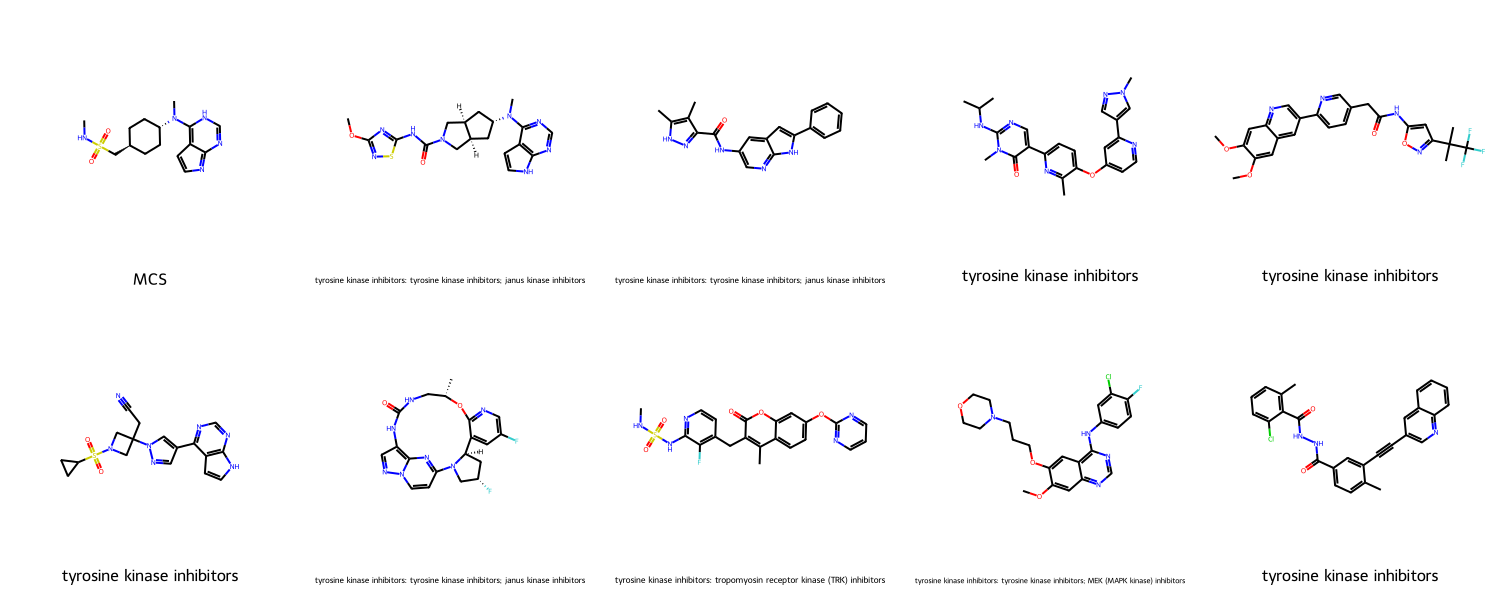

In [61]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols_all[:10], molsPerRow=5, subImgSize=(300, 300), legends=["MCS"] + tki_all['USAN Definition'].tolist())

We cannot observe this substrucutre in any of the molecules! What went wrong?

If we look into the documentation of the [`rdFMCS.FindMCS`](https://www.rdkit.org/docs/source/rdkit.Chem.rdFMCS.html) function we see that there is an argument `completeRingsOnly`that is set to False by default. This means that the MCS can be any substructure and does not have to be a ring. Let's set this argument to True and see if that changes the result.

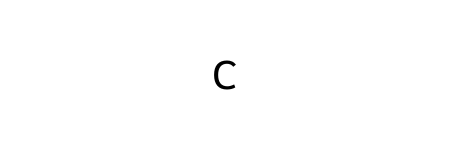

In [63]:
# extract MCS again but this time with complete rings only
mcs = rdFMCS.FindMCS(mols_all, completeRingsOnly=True)
mcs_smarts = mcs.smartsString
mcs_mol = Chem.MolFromSmarts(mcs_smarts)
mcs_mol

Well, that looks even stranger. Maybe the structures are just too diverse. We can assume that there are mulitple substructures that can engage the hinge region and imitate the base of ATP. Let's lower the threshold that defines the number of molecules that need to contain the substructure. We can do this by setting the `threshold` argument in the `rdFMCS.FindMCS` function. Let's lower it stepwise until we get something more reasonable.

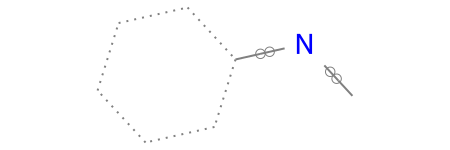

In [65]:
# extract MCS again but this time adding a threshold of 0.5
mcs = rdFMCS.FindMCS(mols_all, completeRingsOnly=True, threshold = 0.5)
mcs_smarts = mcs.smartsString
mcs_mol = Chem.MolFromSmarts(mcs_smarts)
mcs_mol

Now, this already looks more interesting! This means that 50% of the TKI in our dataset contain this pattern. Let's visualize our molecules again together with the found MCS to see if it makes sense.

/Users/PhilippeLoewen_1/miniconda3/envs/ppchem/lib/python3.10/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


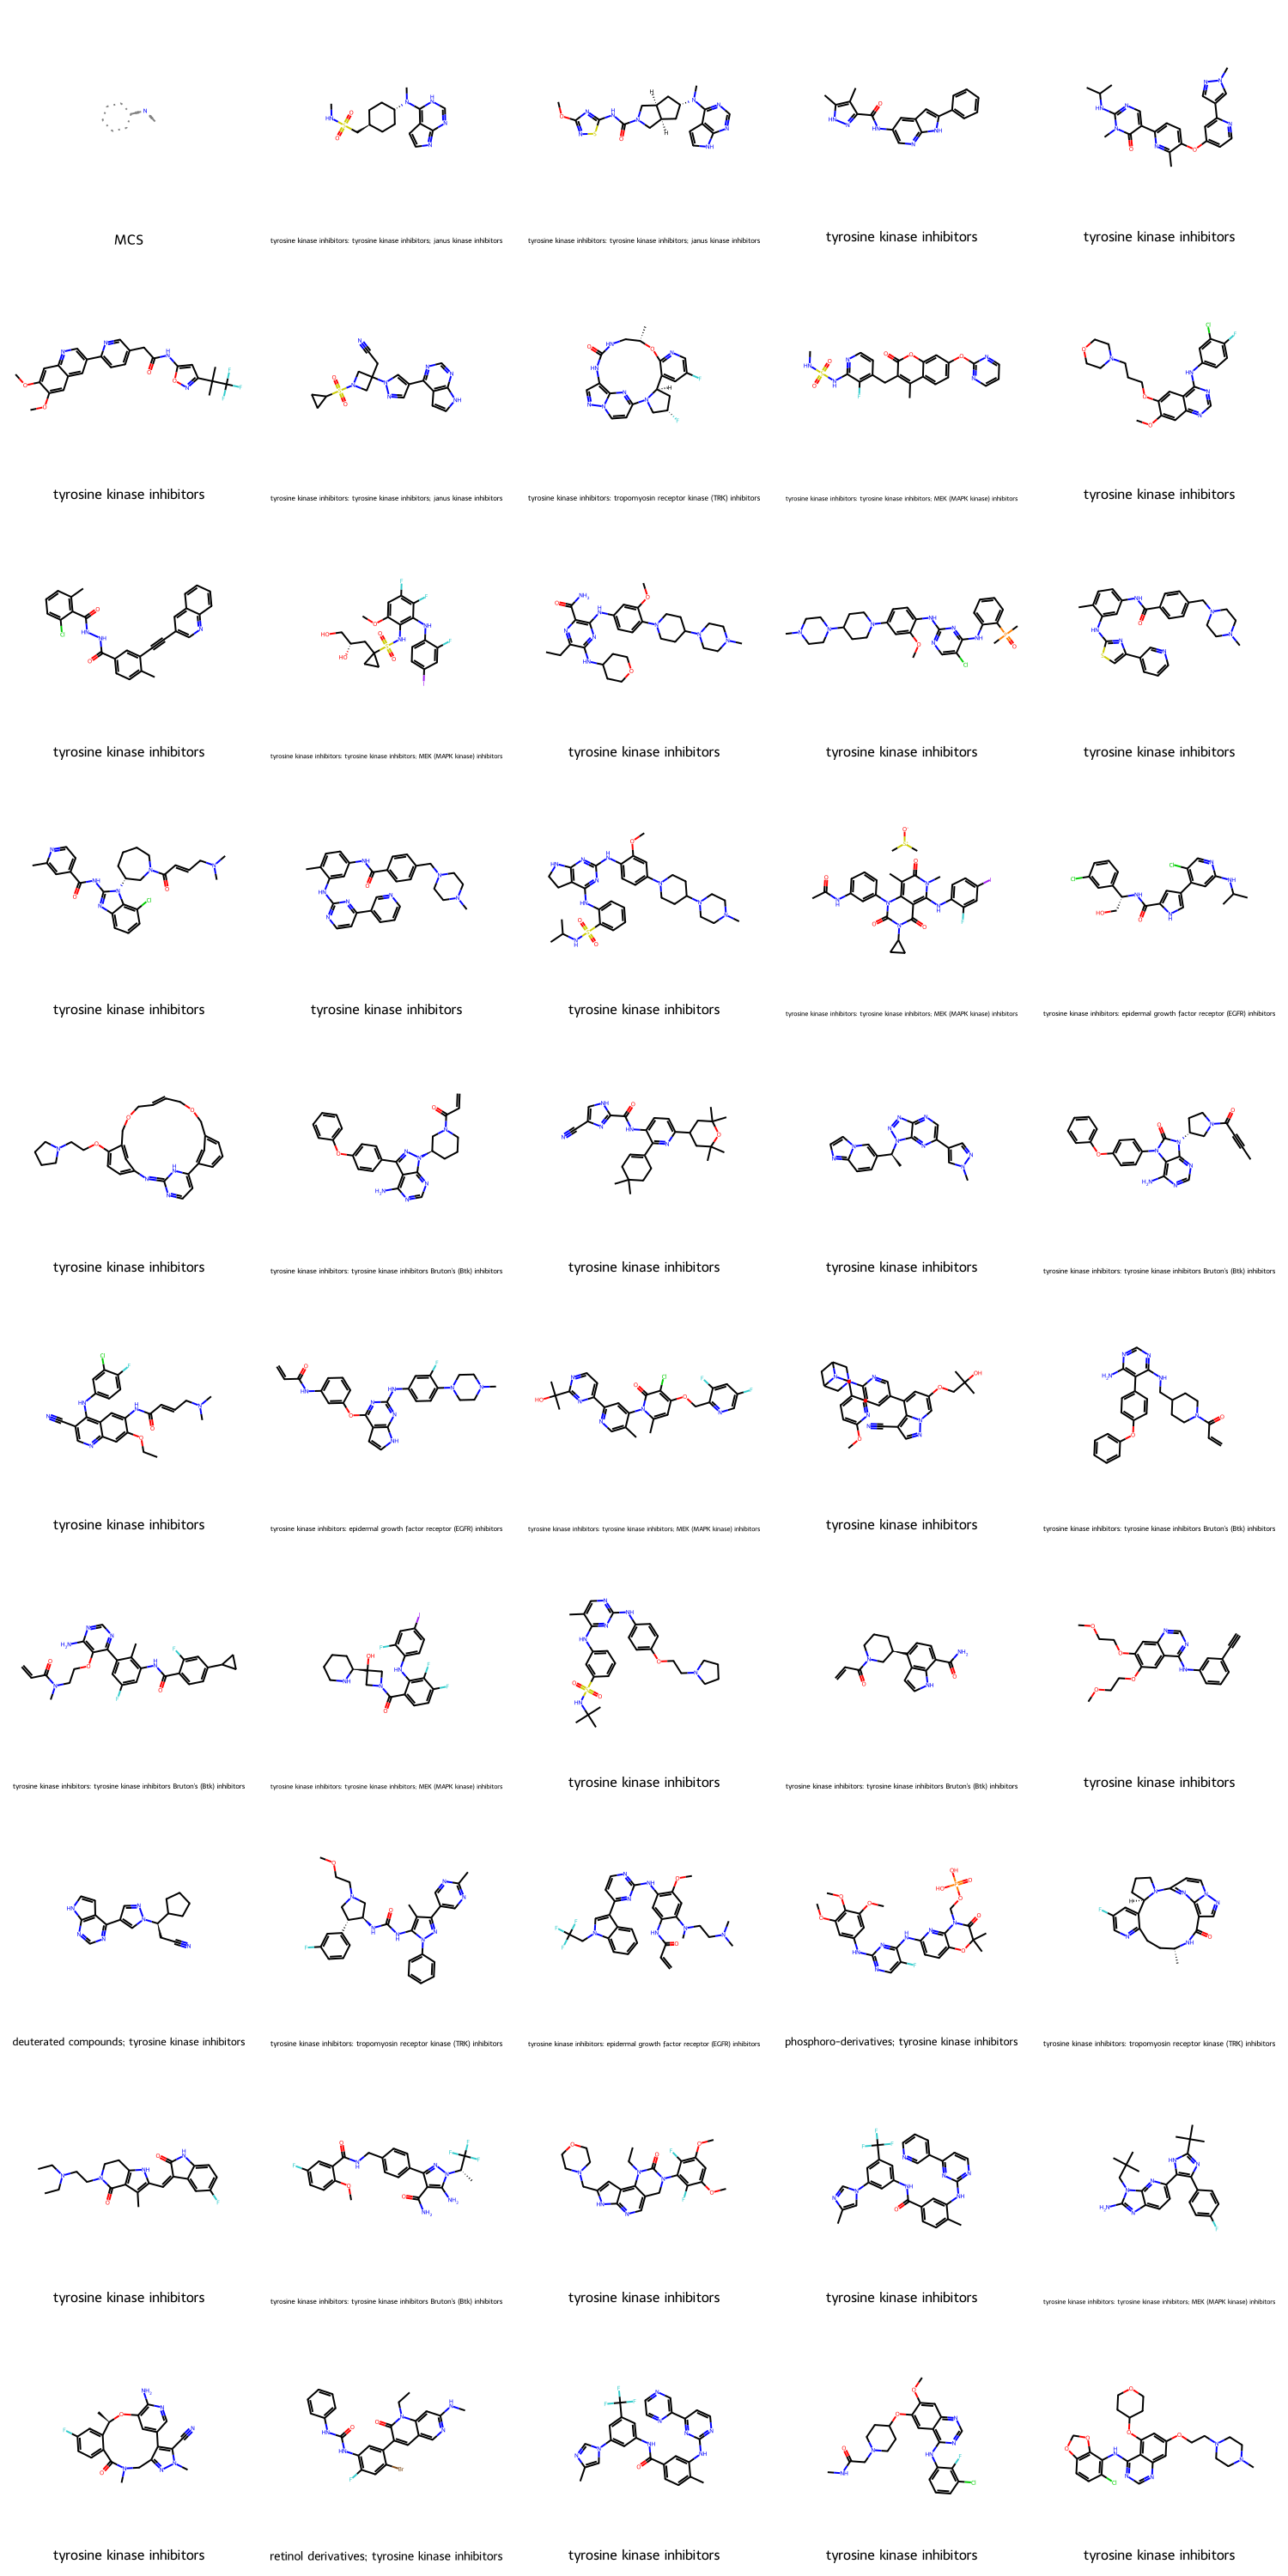

In [66]:
Draw.MolsToGridImage([mcs_mol] + mols_all, molsPerRow=5, subImgSize=(300, 300), legends=["MCS"] + tki_all['USAN Definition'].tolist())

## Conformer generation
A molecule can appear in mutliple conformations, meaning a specific geometric arrangement of atoms in a molecule. Conformer generation is the process of generating different conformations of a molecule. Conformer generation is important in many aspects of chemistry as often the molecules properties and bioactivity or reactivity depend on its conformation. RDKit provides a few functions for conformer generation in the `rdkit.Chem.AllChem` module. One of them is the [`EmbedMolecule`](https://www.rdkit.org/docs/source/rdkit.Chem.rdDistGeom.html) function, which generates a single conformation of a molecule. Another function is the [`EmbedMultipleConfs`](https://www.rdkit.org/docs/source/rdkit.Chem.rdDistGeom.html) function, which generates multiple conformations of a molecule. Let's see this in action on the S-thalidomide structure

In [67]:
from rdkit.Chem import AllChem

First, let's generate one conformer for the S-Thalidomide using [`EmbedMolecule`](https://www.rdkit.org/docs/source/rdkit.Chem.rdDistGeom.html):

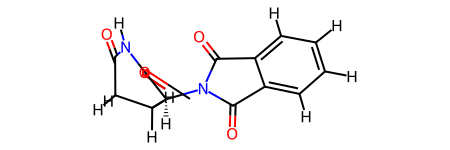

In [69]:
AllChem.EmbedMolecule(s_thalidomide)
s_thalidomide
s_thalidomide

RDKit already complains that we should consider calling `AddHs()`. Why is that? Let's add the hydrogens and try again.

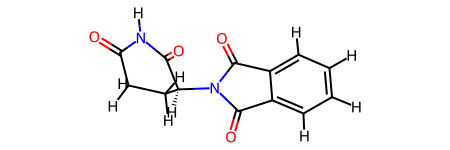

In [70]:
s_thalidomide = Chem.AddHs(s_thalidomide)
AllChem.EmbedMolecule(s_thalidomide)
s_thalidomide

In [71]:
# see how many conformers the molecule has (should return 1)
s_thalidomide.GetNumConformers()

1

We already discussed that one molecule can usually have multiple conformations. You can observe this by rerunning the cell above several times. You should be able to see a new conformer every time. 

Now, let's generate `10` conformers with [`EmbedMultipleConfs`](https://www.rdkit.org/docs/source/rdkit.Chem.rdDistGeom.html) and visualize them.

In [72]:
AllChem.EmbedMultipleConfs(s_thalidomide, numConfs=10, enforceChirality=True)

In [73]:
# see how many conformers the molecule has (should return 10)
s_thalidomide.GetNumConformers()

10

For the set of conformers we can calculate the RMSDs between them.

**What is the RMSD?**
The root-mean square deviation (RMSD) of two structures is a measure of the average distance between the atoms of two superimposed structures. The basic equation for calculating RMSD is below:

$$RMSD = \sqrt{\frac{1}{n}\sum_{i=1}^{n}d_i^2}$$

where $n$ is the number of atoms, and $d_i$ is the distance between the atoms in the two structures. The lower the RMSD, the more similar the structures are.

Let's calculate the RMSDs between the conformers.

In [75]:
rmsds = AllChem.GetConformerRMSMatrix(s_thalidomide)
rmsds

[2.0755816789081347,
 0.9023036553501274,
 2.291080970884248,
 2.0082535899339664,
 0.6214307323301594,
 2.285966737931644,
 2.224246753927357,
 1.5787539978397922,
 2.4073016328168797,
 1.5233112592527274,
 0.8944519994591923,
 2.1141317313022867,
 1.0877537286571557,
 2.12383323068737,
 2.317875246117281,
 0.8110260885090653,
 2.26445197773269,
 0.22875825676841527,
 2.257723380841539,
 2.383640149588503,
 0.926948569001309,
 0.7101257265811065,
 2.0848524896710012,
 1.0046700021317825,
 2.081582383999073,
 2.2588709731134813,
 0.40389462846457586,
 0.836340421020542,
 0.8871588319297972,
 2.1696329990348233,
 0.7787241058304426,
 2.1856281666893524,
 2.323064837144224,
 0.46145847137701834,
 0.6087469621502902,
 0.4918681655001931,
 2.227397653184044,
 2.9031228787347905,
 2.33961823838867,
 2.8716170584956684,
 2.27266049858222,
 2.2542415766295796,
 2.301509783950186,
 2.248004774482189,
 2.247323686508217]

Text(0.5, 0, 'RMSD')

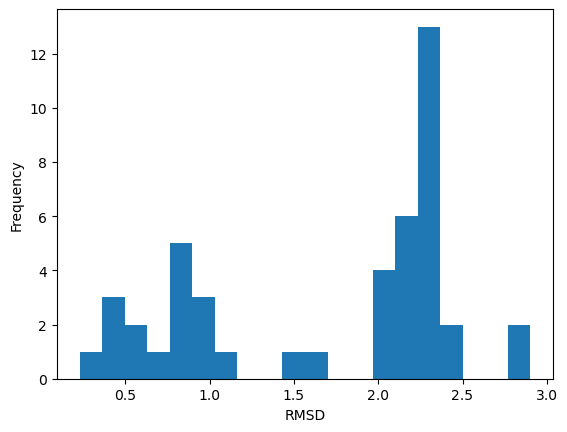

In [76]:
# plot distribution of RMSDs
import matplotlib.pyplot as plt
plt.hist(rmsds, bins=20);
plt.ylabel("Frequency")
plt.xlabel("RMSD")

Great! We can see that the molecule has multiple conformations that are actually different. This is important to consider when working with molecules, as the properties of the molecule can depend on its conformation. Often we are interested in the lowest energy conformer since it is the most stable one. Let's minimize the energy of the conformers by using a force field. A force field is a set of equations that describe the potential energy of a molecule. The potential energy is the energy that is stored in the molecule due to the arrangement of the atoms. We will change the arrangement slightly in order to minimize the potential energy. RDKit has mutliple force fields implemented from which we will use the UFF force field.

These three functions are used:
* [`UFFGetMoleculeForceField`](https://www.rdkit.org/docs/source/rdkit.Chem.rdForceFieldHelpers.html#rdkit.Chem.rdForceFieldHelpers.UFFGetMoleculeForceField)
* [`CalcEnergy`](https://www.rdkit.org/docs/source/rdkit.ForceField.rdForceField.html#rdkit.ForceField.rdForceField.ForceField.CalcEnergy)
* [`Minimize`](https://www.rdkit.org/docs/source/rdkit.ForceField.rdForceField.html#rdkit.ForceField.rdForceField.ForceField.Minimize)

In [77]:
# loop over all conformers, minimize and calculate the energy
energies = []
for conf in s_thalidomide.GetConformers():
    ff = AllChem.UFFGetMoleculeForceField(s_thalidomide, confId=conf.GetId())
    energy_before = ff.CalcEnergy()
    ff.Minimize()
    energy_after = ff.CalcEnergy()
    energies.append(energy_after)
    print(f"Energy before: {energy_before:.4f}; Energy after: {energy_after:.4f}")
energies

Energy before: 82.9083; Energy after: 60.0524
Energy before: 79.3154; Energy after: 59.5775
Energy before: 84.2807; Energy after: 59.5775
Energy before: 82.2824; Energy after: 59.5775
Energy before: 82.6407; Energy after: 60.0524
Energy before: 198.5128; Energy after: 59.5775
Energy before: 77.8070; Energy after: 59.5775
Energy before: 78.5729; Energy after: 59.5775
Energy before: 76.3092; Energy after: 59.5775
Energy before: 97.6454; Energy after: 60.0524


[60.05238866366482,
 59.577505141667345,
 59.5775051337085,
 59.57750512032797,
 60.05238866838273,
 59.57750511826837,
 59.57750512528709,
 59.57750514344906,
 59.57750512118574,
 60.052388716133606]

We saw that each conformer gets adapted and the calculated energy is lowered after minimization. This is a good approach to get the most stable conformer of a molecule. Let's calculate the RMSDs between the minimized conformers.

Text(0.5, 0, 'RMSD')

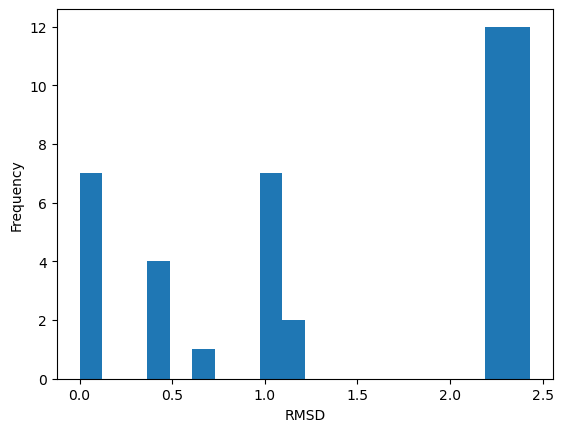

In [78]:
rmsds = AllChem.GetConformerRMSMatrix(s_thalidomide)
plt.hist(rmsds, bins=20);
plt.ylabel("Frequency")
plt.xlabel("RMSD")

We can see that even though we minimized the structures the conformers are still different from each other. Likely, because there are several "good" conformers for this small structure. We can still select the minimal-energy conformer based on the calculated energies and numpy's `argmin` function.

In [79]:
import numpy as np
min_idx = np.argmin(energies)
min_energy = energies[min_idx]
min_energy

59.57750511826837